# Mask and Universe #

In [1]:
# Import Libraries

# Data Management
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt

# Handle Files
import sys
import os

# Import Local Functions
sys.path.append(os.path.abspath("../source"))

In [2]:
# Call the Benchmark Composition
df_comp = pd.read_csv(r'..\additional_data\index_comp.csv')

# Dates Index
df_comp.set_index('date', inplace = True)
df_comp.index = pd.to_datetime(df_comp.index)
#df_comp = df_comp.loc['2010':]

df_comp

,tickers
date,
1996-01-02,"AAL,AAMRQ,AAPL,ABI,ABS,ABT,ABX,ACKH,ACV,ADM,AD..."
1996-01-03,"AAL,AAMRQ,AAPL,ABI,ABS,ABT,ABX,ACKH,ACV,ADM,AD..."
1996-01-04,"AAL,AAMRQ,AAPL,ABI,ABS,ABT,ABX,ACKH,ACV,ADM,AD..."
1996-01-10,"AAL,AAMRQ,AAPL,ABI,ABS,ABT,ABX,ACKH,ACV,ADM,AD..."
1996-01-11,"AAL,AAMRQ,AAPL,ABI,ABS,ABT,ABX,ACKH,ACV,ADM,AD..."
...,...
2024-09-23,"A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP..."
2024-09-30,"A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP..."
2024-10-01,"A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP..."


In [3]:
# Now we are going to split the strings of the observations
df_comp['tickers'] = df_comp['tickers'].str.split(', ')
df_comp['tickers'] = df_comp['tickers'].apply(lambda x: [ticker.strip() for ticker in x])

df_comp.iloc[0]

tickers    [AAL,AAMRQ,AAPL,ABI,ABS,ABT,ABX,ACKH,ACV,ADM,A...
Name: 1996-01-02 00:00:00, dtype: object

In [4]:
# Let us get the historical tickers 
unique_tickers = []

# Loop
for date in df_comp.index:
    
    # Call the Lists of Tickers for each date
    tickers = df_comp.loc[date].iloc[0][0].split(',')
    
    # Store them on a list
    unique_tickers = list(set(unique_tickers) | set(tickers))

unique_tickers = sorted(unique_tickers)

len(unique_tickers)

1175

In [5]:
# Now create a dataframe with all zeros
mask = pd.DataFrame(0, index=df_comp.index, columns=unique_tickers)

mask

,A,AABA,AAL,AAMRQ,AAP,AAPL,ABBV,ABC,ABI,ABKFQ,...,XRX,XTO,XYL,YNR,YRCW,YUM,ZBH,ZBRA,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
1996-01-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996-01-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996-01-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996-01-10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996-01-11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2024-09-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2024-10-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# And we change zeros to ones if each stock was in the benchmark's composition at each date
for date in df_comp.index:
    # Select the available tickers
    tickers = df_comp.loc[date].iloc[0][0].split(',')
    
    # One if ticker was in the composition at each date
    for ticker in tickers:
        mask.loc[date, ticker] = 1

# Show
mask

,A,AABA,AAL,AAMRQ,AAP,AAPL,ABBV,ABC,ABI,ABKFQ,...,XRX,XTO,XYL,YNR,YRCW,YUM,ZBH,ZBRA,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
1996-01-02,0,0,1,1,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
1996-01-03,0,0,1,1,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
1996-01-04,0,0,1,1,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
1996-01-10,0,0,1,1,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
1996-01-11,0,0,1,1,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-23,1,0,0,0,0,1,1,0,0,0,...,0,0,1,0,0,1,1,1,0,1
2024-09-30,1,0,0,0,0,1,1,0,0,0,...,0,0,1,0,0,1,1,1,0,1
2024-10-01,1,0,0,0,0,1,1,0,0,0,...,0,0,1,0,0,1,1,1,0,1


In [7]:
# Let's found those stocks that alternate frequently
def count_alternations(column):
    return (column != column.shift()).sum() - 1

In [8]:
# Apply the function
alternations = mask.apply(count_alternations).rename('alternations')

alternations.sort_values(ascending=False)

COV     5
OI      4
RIG     4
GGP     4
MXIM    4
       ..
CLX     0
PNC     0
BF.B    0
PCAR    0
JPM     0
Name: alternations, Length: 1175, dtype: int64

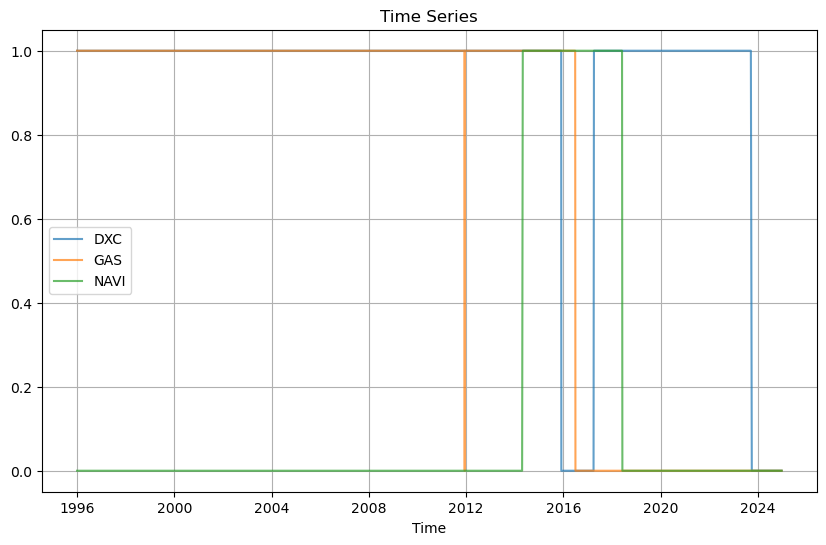

In [9]:
# Let's Plot the Transitions
stocks = ['DXC', 'GAS', 'NAVI']

# Plot
plt.figure(figsize=(10, 6))
plt.plot(mask[stocks], label=stocks, alpha=0.7)
# Config
plt.title('Time Series')
plt.xlabel('Time')
plt.legend()
plt.grid()

# Show
plt.show()

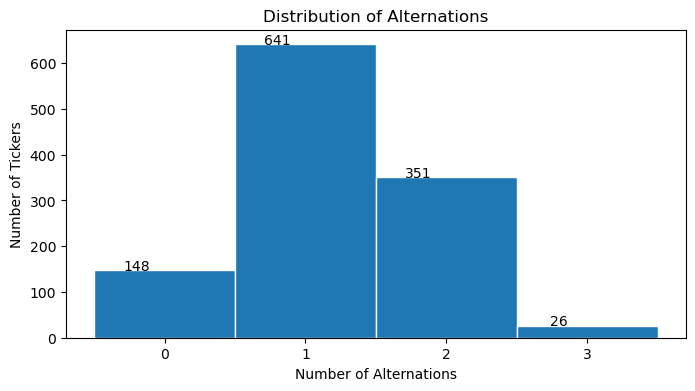

In [10]:
# Plot the distribution
plt.figure(figsize=(8, 4))
plt.hist(alternations, bins=np.arange(0, 5) - 0.5, edgecolor='white')
plt.title('Distribution of Alternations')
plt.xlabel('Number of Alternations')
plt.ylabel('Number of Tickers')
plt.xticks(range(4))

# Add Notations
for count in range(4):
    count_value = (alternations == count).sum()
    plt.text(count - 0.2, count_value + 0.1, str(count_value), ha='center')

plt.show()

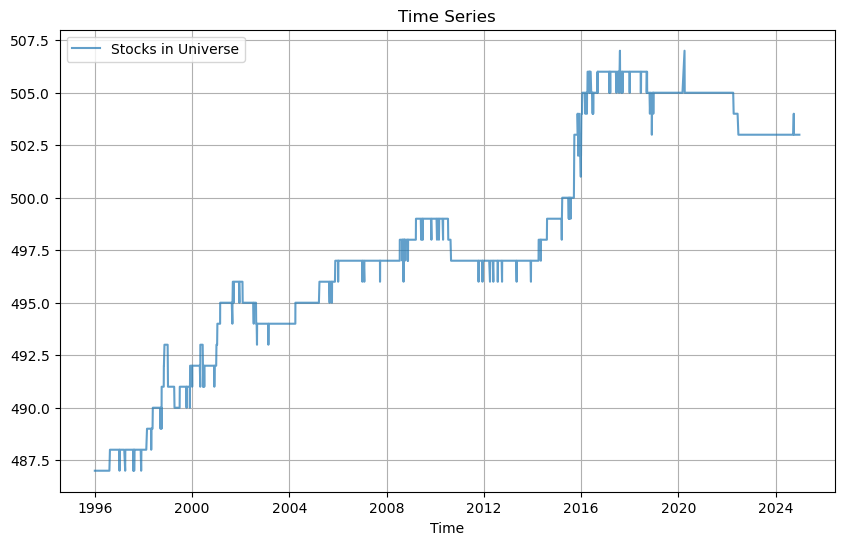

In [11]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(mask.sum(axis=1), label='Stocks in Universe', alpha=0.7)

# Config
plt.title('Time Series')
plt.xlabel('Time')
plt.legend()
plt.grid()

# Show
plt.show()

In [12]:
# We import Data of Stocks that contains at least two years of trading data (504 days)
data = pd.read_csv(r'..\additional_data\index_data.csv')
data.rename(columns={data.columns[0]: 'date'}, inplace=True)
data.set_index('date', inplace=True)
data.index = pd.to_datetime(data.index)

data

,A,AAL,AAP,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ACS,...,XEL,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2010-01-05,-0.010922,0.107246,-0.005962,0.001727,NaN,NaN,-0.008112,-0.003341,0.006161,0.080043,...,-0.011930,0.003897,-0.011959,0.001158,NaN,-0.003425,0.031166,-0.001745,0.034651,NaN
2010-01-06,-0.003559,-0.042314,0.008682,-0.016034,NaN,NaN,0.005539,-0.004332,0.010574,5.230697,...,0.001918,0.008606,0.006567,-0.009302,NaN,-0.007175,-0.000323,-0.007717,0.083381,NaN
2010-01-07,-0.001297,0.029044,-0.000247,-0.001850,NaN,NaN,0.008250,-0.005900,-0.000936,-5.230697,...,-0.004322,-0.003147,0.013006,0.004662,NaN,-0.000288,0.022681,-0.025318,0.106160,NaN
2010-01-08,-0.000324,-0.019268,0.003945,0.006626,NaN,NaN,0.005099,-0.001974,-0.003986,5.238894,...,0.000481,-0.004019,0.000000,-0.003495,NaN,0.000288,-0.021228,-0.003256,-0.016320,NaN
2010-01-11,0.000649,-0.019647,-0.009891,-0.008861,NaN,NaN,0.005074,-0.003110,-0.000940,-5.238894,...,0.009574,0.011157,0.012838,0.024209,NaN,0.017134,0.021860,0.003256,0.006076,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,0.011083,0.005780,-0.000457,0.011413,0.008985,0.003488,0.003929,0.006278,0.007940,NaN,...,0.007210,0.000940,-0.002642,-0.023556,0.005432,0.008480,0.004483,0.012187,0.010791,0.002553
2024-12-26,-0.001986,0.000000,0.011595,0.003171,-0.004454,0.002442,0.004434,0.002802,-0.003324,NaN,...,-0.000440,0.000845,0.013663,-0.006522,0.002705,0.007380,-0.000466,0.003559,0.006889,0.004966
2024-12-27,-0.002137,0.000000,-0.004077,-0.013331,-0.006663,-0.014403,-0.002432,-0.006369,-0.011862,NaN,...,-0.000587,-0.000094,-0.003163,-0.002183,-0.007966,-0.005678,-0.003549,-0.019799,-0.012179,-0.005574


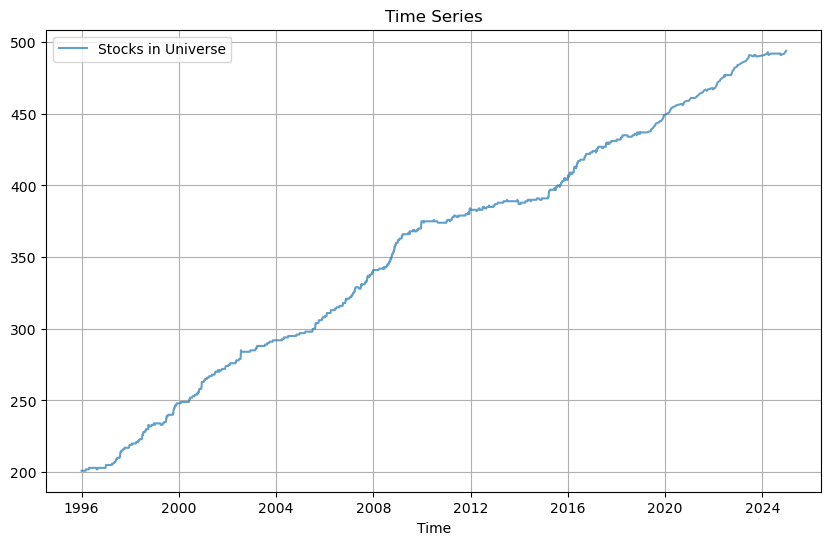

In [13]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(mask[data.columns].sum(axis=1), label='Stocks in Universe', alpha=0.7)

# Config
plt.title('Time Series')
plt.xlabel('Time')
plt.legend()
plt.grid()

# Show
plt.show()

In [25]:
# Now add the same index to the mask
mask = mask.reindex(data.index)
mask = mask.ffill().bfill()

# Cut the columns
mask = mask[data.columns]

mask

,A,AAL,AAP,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ACS,...,XEL,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2010-01-05,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
2010-01-06,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
2010-01-07,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
2010-01-08,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
2010-01-11,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
2024-12-26,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
2024-12-27,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0


In [32]:
# Now let us filter the data to find those stocks with correct coverage of returns
condition = (mask == 1) & data.isna()

# Find columns with issues
stocks_with_issues = condition.any(axis=0)

# Filter
problematic_stocks = stocks_with_issues[stocks_with_issues].index.tolist()

problematic_stocks

['ABBV',
 'ADT',
 'AYE',
 'BDK',
 'BEAM',
 'BMC',
 'CEG',
 'COL',
 'COV',
 'DELL',
 'DNB',
 'DOW',
 'ESRX',
 'EVHC',
 'FCPT',
 'FOX',
 'FOXA',
 'FTV',
 'GAS',
 'GR',
 'HAR',
 'IR',
 'JAVA',
 'KHC',
 'MEE',
 'MHS',
 'MI',
 'MMI',
 'NE',
 'NFX',
 'NSM',
 'PCL',
 'PLL',
 'PTV',
 'PX',
 'S',
 'SE',
 'SII',
 'STI',
 'STR',
 'SUN',
 'TE',
 'TEG']

In [34]:
# We must drop them :(
mask_filtered = mask.drop(columns=problematic_stocks)

mask_filtered

,A,AAL,AAP,AAPL,ABNB,ABT,ACGL,ACN,ACS,ADBE,...,XEL,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2010-01-05,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
2010-01-06,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
2010-01-07,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
2010-01-08,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
2010-01-11,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
2024-12-26,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
2024-12-27,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0


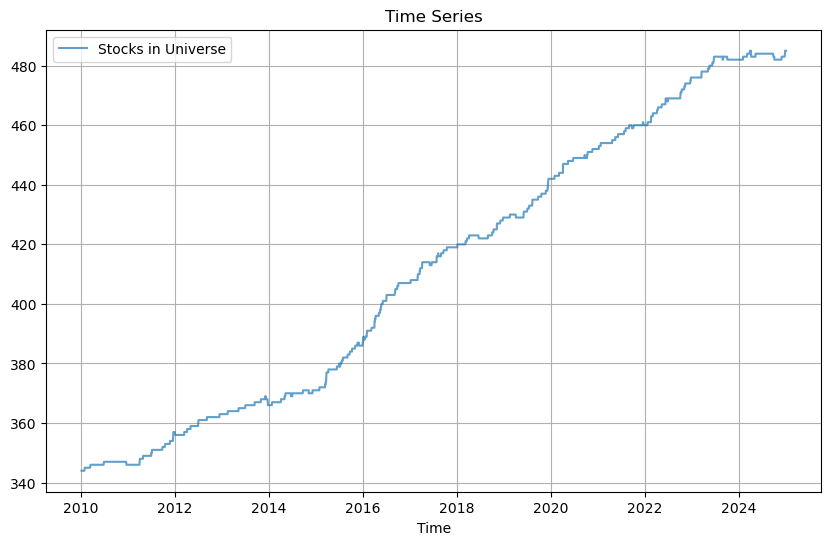

In [35]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(mask_filtered.sum(axis=1), label='Stocks in Universe', alpha=0.7)

# Config
plt.title('Time Series')
plt.xlabel('Time')
plt.legend()
plt.grid()

# Show
plt.show()

In [36]:
# Now export our mask
mask_filtered.to_csv(r'..\additional_data\mask.csv')